# BTC ANALYSIS
### 1. [Python & MySQL](#1)<br>
- [Library](#1a)<br>
- [Dowload K-line from binance](#1a1)<br>
- [Connect to MySQL](#1b)<br>
- [Frequency of the lowest price of the day timeframe H1 - Query](#1c)<br>
- [Frequency of the lowest price of the day in a week timeframe H1 - Query](#1d)<br>
- [Frequency of the highest price of the day timeframe H1 - Query](#1e)<br>
- [Frequency of the highest price of the day in a week timeframe H1 - Query](#1g)<br>
- [Frequency of significant price fluctuations during the day - Query](#1h)<br>
- [Frequency of significant price fluctuations during the week - Query](#1i)<br>
### 2. [Dataframe](#2)<br>
- [( DF ) Full dataframe](#2a)<br>
- [(DF1) Frequency of the lowest price of the day timeframe H1 - Dataframe](#2b)<br>
- [(DF2) Frequency of the lowest price of the day in a week timeframe H1 - Dataframe](#2c)<br>
- [(DF3) Frequency of the highest price of the day timeframe H1 - Dataframe](#2d)<br>
- [(DF4) Frequency of the highest price of the day in a week timeframe H1 - Dataframe](#2e)<br>
- [(DF5) Frequency of significant price fluctuations during the day - Dataframe](#2g)<br>
- [(DF6) Frequency of significant price fluctuations during the week - Dataframe](#2h)<br>
### 3. [Information,visualization and analysis](#3) <br>
- [( DF ) Dataframe information](#3a1)<br>
- [Frequency of the lowest price of the day timeframe H1](#3a)<br>
- [Frequency of the lowest price of the day in a week timeframe H1](#3b)<br>
- [Frequency of the highest price of the day timeframe H1](#3c)<br>
- [Frequency of the highest price of the day in a week timeframe H1](#3d)<br>
- [Frequency of significant price fluctuations during the day](#3e)<br>
- [Frequency of significant price fluctuations during the week](#3g)<br>
- [Analysis all](#3h)<br>
### 4. [Frequency of the lowest price of the day timeframe H1](#4) <br>
### 5. [Choropleth Maps](#5) <br>

### 1. Python & MySQL : <a id="1"></a>

* #### Library : <a id="1a"></a>

In [2]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
import scipy
from datetime import datetime
import requests
import mysql.connector
import seaborn as sns


* #### Dowload K-line from binance : <a id="1a1"></a>

In [3]:
'''
def get_binance_data_by_requests(ticker,interval,start,end):
      """
      interval: str tick interval - 4h/1h/1d ...
      """
      columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
      usecols=['open', 'high', 'low', 'close', 'volume', 'qav','num_trades','taker_base_vol','taker_quote_vol']
      start = int(datetime.timestamp(pd.to_datetime(start))*1000)
      end_u = int(datetime.timestamp(pd.to_datetime(end))*1000)
      df = pd.DataFrame()
      print(f'Downloading {interval} {ticker} ohlc-data ...', end=' ')
      while True:
        url = f'https://www.binance.com/api/v3/klines?symbol={ticker}&interval={interval}&limit=1000&startTime={start}#&endTime={end_u}'
        data = pd.DataFrame(requests.get(url, headers={'Cache-Control': 'no-cache', "Pragma": "no-cache"}).json(), columns=columns, dtype=np.float64)    
        start = int(data.open_time.tolist()[-1])+1
        data.index = [pd.to_datetime(x, unit='ms').strftime('%Y-%m-%d %H:%M:%S') for x in data.open_time]
        data = data[usecols]
        df = pd.concat([df, data], axis=0)
        if end in data.index.tolist():
          break
      print('Done.')
      df.index = pd.to_datetime(df.index)
      df = df.loc[:end]
      return df
BTC = get_binance_data_by_requests(ticker='BTCUSDT', interval='1h', start='2017-01-01 00:00:00', end='2023-10-27 00:00:00')
BTC.to_csv('BTC.csv')
'''

'\ndef get_binance_data_by_requests(ticker,interval,start,end):\n      """\n      interval: str tick interval - 4h/1h/1d ...\n      """\n      columns = [\'open_time\',\'open\', \'high\', \'low\', \'close\', \'volume\',\'close_time\', \'qav\',\'num_trades\',\'taker_base_vol\',\'taker_quote_vol\', \'ignore\']\n      usecols=[\'open\', \'high\', \'low\', \'close\', \'volume\', \'qav\',\'num_trades\',\'taker_base_vol\',\'taker_quote_vol\']\n      start = int(datetime.timestamp(pd.to_datetime(start))*1000)\n      end_u = int(datetime.timestamp(pd.to_datetime(end))*1000)\n      df = pd.DataFrame()\n      print(f\'Downloading {interval} {ticker} ohlc-data ...\', end=\' \')\n      while True:\n        url = f\'https://www.binance.com/api/v3/klines?symbol={ticker}&interval={interval}&limit=1000&startTime={start}#&endTime={end_u}\'\n        data = pd.DataFrame(requests.get(url, headers={\'Cache-Control\': \'no-cache\', "Pragma": "no-cache"}).json(), columns=columns, dtype=np.float64)    \n     

* #### Frequency of the lowest price of the day timeframe H1 - Query : <a id="1c"></a>

In [4]:
def Frequency_of_lowest_price_of_the_day_H1():
    sql_query = """
        WITH latest_table AS
        (   
            WITH new_table AS
            (
                SELECT DATE(open_time) as ngay , MIN(close) AS gia
                FROM btc_h1
                GROUP BY DATE(open_time)
            )
            SELECT b.open_time AS OPEN_TIME, n.gia AS PRICE
            FROM new_table AS n
            INNER JOIN btc_h1 AS b
            ON n.ngay = DATE(b.open_time) AND n.gia = b.close
        )
        SELECT HOUR(OPEN_TIME) AS "Thời Gian", COUNT(PRICE) AS "Số Lần"
        FROM latest_table 
        GROUP BY HOUR(OPEN_TIME)
        ORDER BY HOUR(OPEN_TIME) ASC
    """
    return sql_query

* #### Frequency of the lowest price of the day in a week timeframe H1 - Query : <a id="1d"></a>

In [5]:
def Frequency_of_lowest_price_of_the_day_in_a_week_H1():
    sql_query = """
        WITH new_table AS
        (
            SELECT t1.close AS price, t2.open_time,
                CASE
                    WHEN DAYOFWEEK(t2.open_time) = 1 THEN "Sunday"
                    WHEN DAYOFWEEK(t2.open_time) = 2 THEN "Monday"
                    WHEN DAYOFWEEK(t2.open_time) = 3 THEN "Tuesday"
                    WHEN DAYOFWEEK(t2.open_time) = 4 THEN "Wednesday"
                    WHEN DAYOFWEEK(t2.open_time) = 5 THEN "Thursday"
                    WHEN DAYOFWEEK(t2.open_time) = 6 THEN "Friday"
                    ELSE "Saturday"
                END AS DayofWeek
            FROM
            (
                SELECT MIN(close) AS close, YEARWEEK(open_time) AS open_time
                FROM btc_h1
                GROUP BY YEARWEEK(open_time)
            ) AS t1 
            INNER JOIN btc_h1 AS t2
            ON t1.close = t2.close AND t1.open_time = YEARWEEK(t2.open_time)
        )
        SELECT DayofWeek, COUNT(price) as Frequency
        FROM new_table
        GROUP BY DayofWeek 
                ORDER BY
            CASE
                WHEN DayofWeek = "Monday"    THEN 1
                WHEN DayofWeek = "Tuesday"   THEN 2
                WHEN DayofWeek = "Wednesday" THEN 3
                WHEN DayofWeek = "Thursday"  THEN 4
                WHEN DayofWeek = "Friday"    THEN 5
                WHEN DayofWeek = "Saturday"  THEN 6
                ELSE 7
            END, DayofWeek;
    """
    return sql_query

* #### Frequency of the highest price of the day timeframe H1 - Query : <a id="1e"></a>

In [6]:
def Frequency_of_highest_price_of_the_day_H1():
    sql_query = """
        WITH latest_table AS
        (   
            WITH new_table AS
            (
                SELECT DATE(open_time) as ngay , MAX(close) AS gia
                FROM btc_h1
                GROUP BY DATE(open_time)
            )
            SELECT b.open_time AS OPEN_TIME, n.gia AS PRICE
            FROM new_table AS n
            INNER JOIN btc_h1 AS b
            ON n.ngay = DATE(b.open_time) AND n.gia = b.close
        )
        SELECT HOUR(OPEN_TIME) AS "Thời Gian", COUNT(PRICE) AS "Số Lần"
        FROM latest_table 
        GROUP BY HOUR(OPEN_TIME)
        ORDER BY HOUR(OPEN_TIME) ASC
    """
    return sql_query

* #### Frequency of the highest price of the week timeframe H1 - Query : <a id="1g"></a>

In [7]:
def Frequency_of_highest_price_of_the_day_in_a_week_H1():
    sql_query = """
        WITH new_table AS
        (
            SELECT t1.close AS price, t2.open_time,
                CASE
                    WHEN DAYOFWEEK(t2.open_time) = 1 THEN "Sunday"
                    WHEN DAYOFWEEK(t2.open_time) = 2 THEN "Monday"
                    WHEN DAYOFWEEK(t2.open_time) = 3 THEN "Tuesday"
                    WHEN DAYOFWEEK(t2.open_time) = 4 THEN "Wednesday"
                    WHEN DAYOFWEEK(t2.open_time) = 5 THEN "Thursday"
                    WHEN DAYOFWEEK(t2.open_time) = 6 THEN "Friday"
                    ELSE "Saturday"
                END AS DayofWeek
            FROM
            (
                SELECT MAX(close) AS close, YEARWEEK(open_time) AS open_time
                FROM btc_h1
                GROUP BY YEARWEEK(open_time)
            ) AS t1 
            INNER JOIN btc_h1 AS t2
            ON t1.close = t2.close AND t1.open_time = YEARWEEK(t2.open_time)
        )
        SELECT DayofWeek, COUNT(price) as Frequency
        FROM new_table
        GROUP BY DayofWeek 
                ORDER BY
            CASE
                WHEN DayofWeek = "Monday"    THEN 1
                WHEN DayofWeek = "Tuesday"   THEN 2
                WHEN DayofWeek = "Wednesday" THEN 3
                WHEN DayofWeek = "Thursday"  THEN 4
                WHEN DayofWeek = "Friday"    THEN 5
                WHEN DayofWeek = "Saturday"  THEN 6
                ELSE 7
            END, DayofWeek;
    """
    return sql_query

* #### Frequency of significant price fluctuations during the day - Query<a id="1h"></a>

In [8]:
def Frequency_of_significant_price_fluctuations_during_the_day():
    sql_query = """
        WITH latest_table AS
        (   
            WITH new_table AS
            (
                SELECT DATE(open_time) as ngay , MAX(high-low) AS gia
                FROM btc_h1
                GROUP BY DATE(open_time)
            )
            SELECT b.open_time AS OPEN_TIME, n.gia AS PRICE
            FROM new_table AS n
            INNER JOIN btc_h1 AS b
            ON n.ngay = DATE(b.open_time) AND n.gia = (b.high-b.low)
        )
        SELECT HOUR(OPEN_TIME) AS "Thời Gian", COUNT(PRICE) AS "Số Lần"
        FROM latest_table 
        GROUP BY HOUR(OPEN_TIME)
        ORDER BY HOUR(OPEN_TIME) ASC
    """
    return sql_query

* #### Frequency of significant price fluctuations during the week - Query : <a id="1i"></a>

In [9]:
def Frequency_of_significant_price_fluctuations_during_the_week():
    sql_query = """
        WITH new_table AS
        (
            SELECT t1.close AS price, t2.open_time,
                CASE
                    WHEN DAYOFWEEK(t2.open_time) = 1 THEN "Sunday"
                    WHEN DAYOFWEEK(t2.open_time) = 2 THEN "Monday"
                    WHEN DAYOFWEEK(t2.open_time) = 3 THEN "Tuesday"
                    WHEN DAYOFWEEK(t2.open_time) = 4 THEN "Wednesday"
                    WHEN DAYOFWEEK(t2.open_time) = 5 THEN "Thursday"
                    WHEN DAYOFWEEK(t2.open_time) = 6 THEN "Friday"
                    ELSE "Saturday"
                END AS DayofWeek
            FROM
            (
                SELECT MAX(high-low) AS close, YEARWEEK(open_time) AS open_time
                FROM btc_h1
                GROUP BY YEARWEEK(open_time)
            ) AS t1 
            INNER JOIN btc_h1 AS t2
            ON t1.close = t2.high - t2.low AND t1.open_time = YEARWEEK(t2.open_time)
        )
        SELECT DayofWeek, COUNT(price) as Frequency
        FROM new_table
        GROUP BY DayofWeek
        ORDER BY
            CASE
                WHEN DayofWeek = "Monday"    THEN 1
                WHEN DayofWeek = "Tuesday"   THEN 2
                WHEN DayofWeek = "Wednesday" THEN 3
                WHEN DayofWeek = "Thursday"  THEN 4
                WHEN DayofWeek = "Friday"    THEN 5
                WHEN DayofWeek = "Saturday"  THEN 6
                ELSE 7
            END, DayofWeek;

    """
    return sql_query

* #### Connect to MySQL : <a id="1b"></a>

In [10]:
def get_database_from_MySQL_after_query(host,user,password,database,sql_query):
    # Thông tin kết nối
    config = {
        "host": host,    # Địa chỉ máy chủ MySQL
        "user": user,         # Tên người dùng MySQL
        "password": password, # Mật khẩu MySQL
        "database": database       # Tên cơ sở dữ liệu
    }

    # Kết nối tới MySQL
    conn = mysql.connector.connect(**config)

    # Tạo một đối tượng cursor
    cursor = conn.cursor()
    # Thực hiện truy vấn SQL
    cursor.execute(sql_query)

    # Trích xuất kết quả
    results = cursor.fetchall()
    # Đóng kết nối
    df = pd.DataFrame(results)
    conn.close()
    return df

### 2. Dataframe : <a id="2"></a>

* #### Full dataframe: <a id="2a"></a>

In [11]:
def Full_Database():
    sql_query = """
        select * from btc_h1
        """
    return sql_query

In [12]:
df = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","btc",Full_Database())
df.columns = ["open_time",'open','high','low','close','volume','close_time','quote_volume','count','taker_buy_volume',]
df

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,2.023661e+05,171,35.160503,1.509525e+05
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,1.003048e+05,102,21.448071,9.260828e+04
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,3.128231e+04,36,4.802861,2.079532e+04
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,1.924106e+04,25,2.602292,1.129135e+04
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4.239504e+03,28,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...
54152,2023-10-26 20:00:00,34044.02,34200.00,34023.74,34183.99,1301.059650,4.440520e+07,45090,633.961420,2.163790e+07
54153,2023-10-26 21:00:00,34183.99,34212.02,34079.71,34113.84,597.124080,2.038508e+07,24099,275.090910,9.392001e+06
54154,2023-10-26 22:00:00,34113.83,34246.20,34113.83,34227.74,788.160910,2.694237e+07,29447,407.375080,1.392642e+07
54155,2023-10-26 23:00:00,34227.73,34278.00,34138.84,34151.66,599.069940,2.048901e+07,25832,229.854080,7.861483e+06


* #### Frequency of lowest price of the day H1 - Dataframe  : <a id="2b"></a>

In [13]:
df1 = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","btc",Frequency_of_lowest_price_of_the_day_H1())
df1.columns = ['Timeframe H1',"Frequency"]
df1


,Timeframe H1,Frequency
0,0,294
1,1,136
2,2,100
3,3,94
4,4,68
5,5,76
6,6,68
7,7,70
8,8,66
9,9,60


* #### Frequency of the lowest price of the day in a week timeframe H1 - Dataframe  : <a id="2c"></a>

In [14]:
df2 = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","btc",Frequency_of_lowest_price_of_the_day_in_a_week_H1())
df2.columns = ['Day',"Frequency"]
df2

,Day,Frequency
0,Monday,46
1,Tuesday,33
2,Wednesday,28
3,Thursday,39
4,Friday,45
5,Saturday,38
6,Sunday,96


* #### Frequency of highest price of the day H1 - Dataframe  : <a id="2d"></a>

In [15]:
df3 = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","btc",Frequency_of_highest_price_of_the_day_H1())
df3.columns = ['Timeframe H1',"Frequency"]
df3

,Timeframe H1,Frequency
0,0,295
1,1,157
2,2,91
3,3,80
4,4,60
5,5,62
6,6,59
7,7,52
8,8,50
9,9,48


* #### Frequency of the highest price of the day in a week timeframe H1 - Dataframe  : <a id="2e"></a>

In [16]:
df4 = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","btc",Frequency_of_highest_price_of_the_day_in_a_week_H1())
df4.columns = ['Day',"Frequency"]
df4

,Day,Frequency
0,Monday,41
1,Tuesday,36
2,Wednesday,40
3,Thursday,26
4,Friday,36
5,Saturday,70
6,Sunday,75


* #### Frequency of significant price fluctuations during the day - Dataframe<a id="2g"></a>

In [17]:
df5 = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","btc",Frequency_of_significant_price_fluctuations_during_the_day())
df5.columns = ['Timeframe H1',"Frequency"]
df5

,Timeframe H1,Frequency
0,0,171
1,1,93
2,2,63
3,3,38
4,4,49
5,5,54
6,6,54
7,7,58
8,8,95
9,9,73


* #### Frequency of significant price fluctuations during the week - Dataframe<a id="2h"></a>

In [18]:
df6 = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","btc",Frequency_of_significant_price_fluctuations_during_the_week())
df6.columns = ['Day',"Frequency"]
df6

,Day,Frequency
0,Monday,54
1,Tuesday,44
2,Wednesday,67
3,Thursday,56
4,Friday,45
5,Saturday,22
6,Sunday,36


### 3. Information,visualization and analysis : <a id="3"></a>

* #### ( DF ) Dataframe information <a id="3a1"></a>

In [19]:
df.shape

(54157, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54157 entries, 0 to 54156
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         54157 non-null  object 
 1   open              54157 non-null  float64
 2   high              54157 non-null  float64
 3   low               54157 non-null  float64
 4   close             54157 non-null  float64
 5   volume            54157 non-null  float64
 6   close_time        54157 non-null  float64
 7   quote_volume      54157 non-null  int64  
 8   count             54157 non-null  float64
 9   taker_buy_volume  54157 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.1+ MB


In [21]:
df.describe()

,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume
count,54157.000000,54157.000000,54157.000000,54157.000000,54157.000000,5.415700e+04,5.415700e+04,54157.000000,5.415700e+04
mean,20376.073844,20482.965232,20262.850795,20376.615206,3105.022284,6.815798e+07,6.017531e+04,1544.264016,3.376004e+07
std,15818.527929,15904.341774,15727.922422,15818.489040,4390.244982,1.053557e+08,9.359552e+04,2185.110889,5.239861e+07
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,7823.990000,7878.380000,7765.000000,7824.440000,971.759730,9.703394e+06,1.095400e+04,490.572200,4.956012e+06
50%,13326.610000,13478.040000,13133.750000,13326.610000,1706.007040,2.676912e+07,2.728600e+04,852.440720,1.305855e+07
75%,29525.010000,29644.330000,29428.650000,29526.580000,3349.872674,8.806879e+07,6.370800e+04,1666.867312,4.337018e+07
max,68635.120000,69000.000000,68451.190000,68633.690000,137207.188600,3.005634e+09,1.442097e+06,68611.450390,1.502977e+09


* #### Frequency of the lowest price of the day timeframe H1 : <a id="3a"></a>

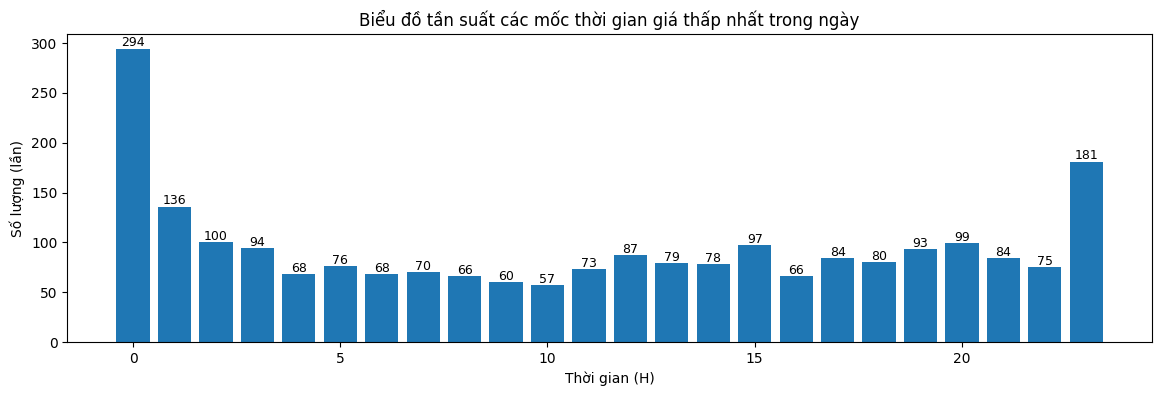

In [22]:
plt.figure(figsize=(14,4))
bars = plt.bar(df1["Timeframe H1"], df1["Frequency"])
plt.title("Biểu đồ tần suất các mốc thời gian giá thấp nhất trong ngày")
plt.xlabel("Thời gian (H)")
plt.ylabel("Số lượng (lần)")

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=9, color='black')
plt.show()

* #### Frequency of the lowest price of the week timeframe H1 : <a id="3b"></a>

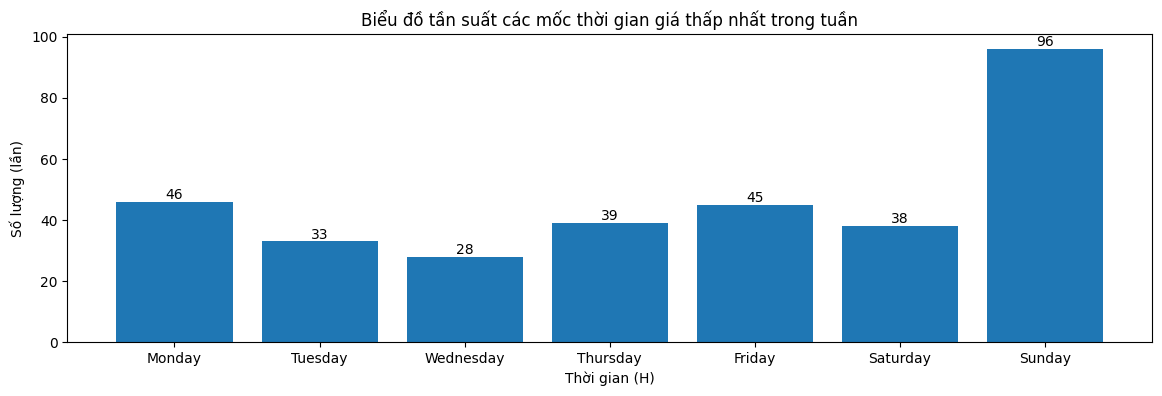

In [23]:
plt.figure(figsize=(14,4))
bars = plt.bar(df2["Day"], df2["Frequency"])
plt.title("Biểu đồ tần suất các mốc thời gian giá thấp nhất trong tuần")
plt.xlabel("Thời gian (H)")
plt.ylabel("Số lượng (lần)")

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

* #### Frequency of the highest price of the day timeframe H1 : <a id="3c"></a>

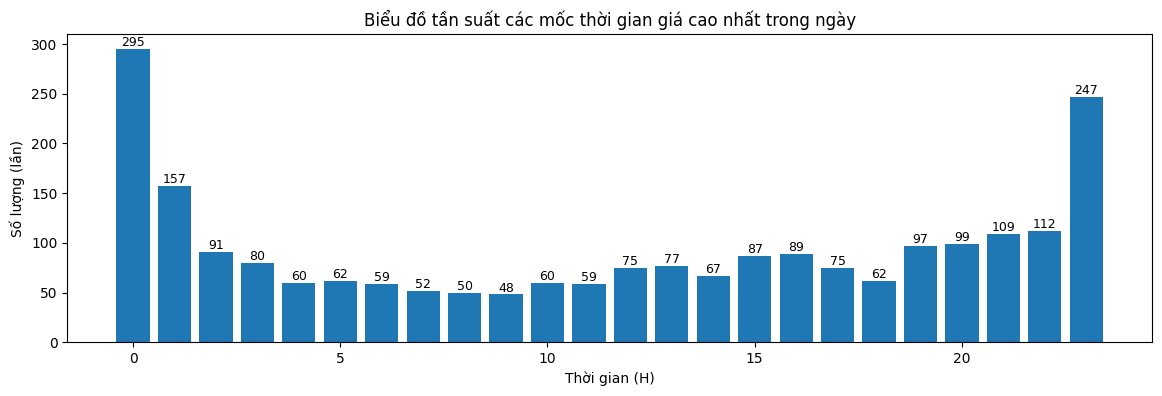

In [24]:
plt.figure(figsize=(14,4))
bars = plt.bar(df3["Timeframe H1"], df3["Frequency"])
plt.title("Biểu đồ tần suất các mốc thời gian giá cao nhất trong ngày")
plt.xlabel("Thời gian (H)")
plt.ylabel("Số lượng (lần)")

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=9, color='black')
plt.show()

* #### Frequency of the highest price of the week timeframe H1 : <a id="3d"></a>

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


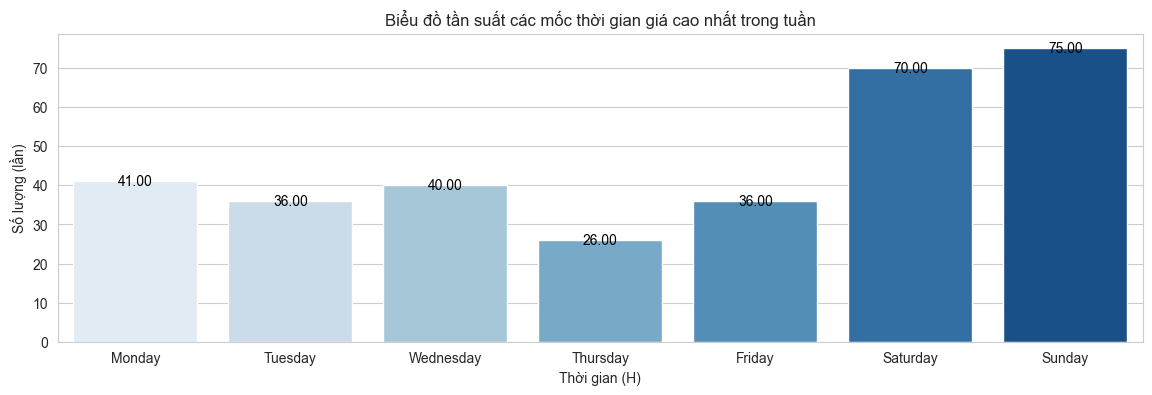

In [25]:
plt.figure(figsize=(14, 4))
sns.set_style("whitegrid")  # Cài đặt phong cách nền cho biểu đồ

# Sử dụng Seaborn để vẽ biểu đồ cột
ax = sns.barplot(x="Day", y="Frequency", data=df4, palette="Blues")

# Đặt tiêu đề và nhãn trục
plt.title("Biểu đồ tần suất các mốc thời gian giá cao nhất trong tuần")
plt.xlabel("Thời gian (H)")
plt.ylabel("Số lượng (lần)")

# Thêm giá trị trên các thanh bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

plt.show()

* #### Frequency of significant price fluctuations during the day : <a id="3e"></a>

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


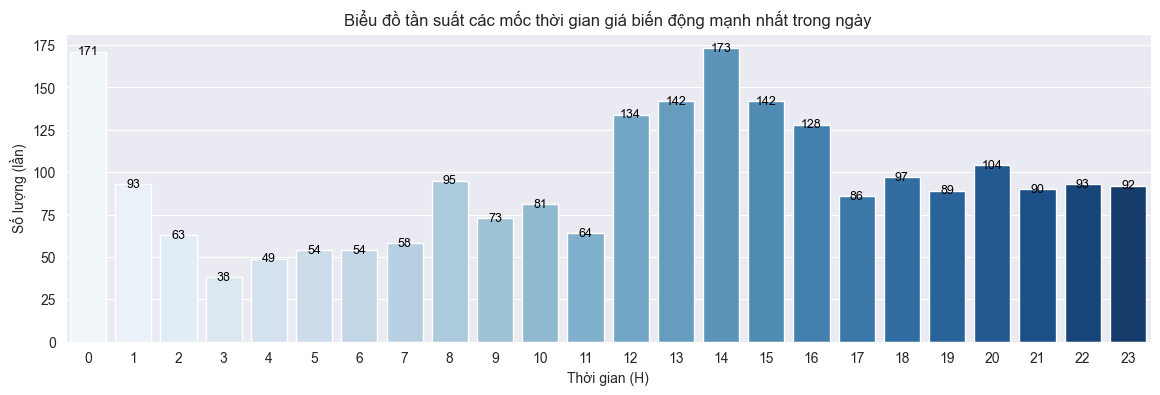

In [26]:
plt.figure(figsize=(14, 4))
sns.set_style("darkgrid")  # Cài đặt phong cách nền cho biểu đồ

# Sử dụng Seaborn để vẽ biểu đồ cột
ax = sns.barplot(x="Timeframe H1", y="Frequency", data=df5, palette="Blues")

# Đặt tiêu đề và nhãn trục
plt.title("Biểu đồ tần suất các mốc thời gian giá biến động mạnh nhất trong ngày")
plt.xlabel("Thời gian (H)")
plt.ylabel("Số lượng (lần)")

# Thêm giá trị trên các thanh bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black')

plt.show()

* #### Frequency of significant price fluctuations during the week : <a id="3g"></a>

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


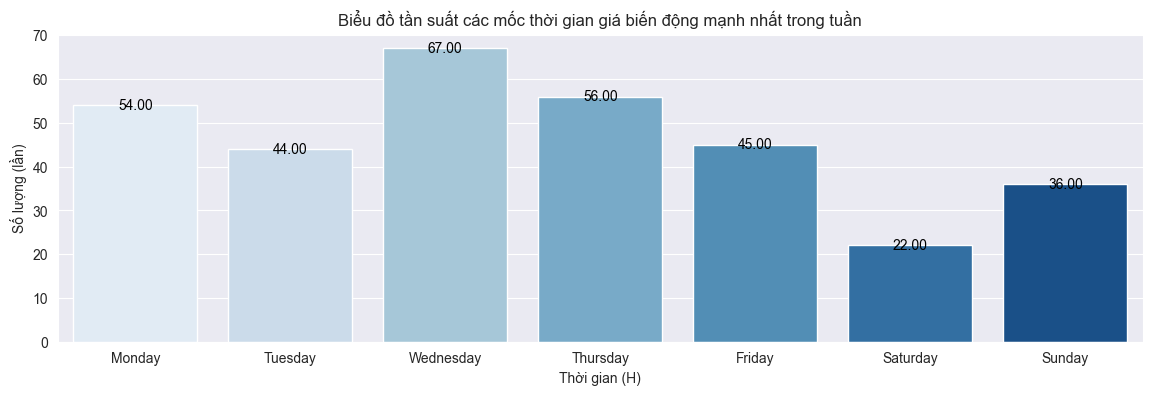

In [32]:
plt.figure(figsize=(14, 4))
sns.set_style("darkgrid")  # Cài đặt phong cách nền cho biểu đồ

# Sử dụng Seaborn để vẽ biểu đồ cột
ax = sns.barplot(x="Day", y="Frequency", data=df6,palette="Blues")

# Đặt tiêu đề và nhãn trục
plt.title("Biểu đồ tần suất các mốc thời gian giá biến động mạnh nhất trong tuần")
plt.xlabel("Thời gian (H)")
plt.ylabel("Số lượng (lần)")

# Thêm giá trị trên các thanh bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

plt.show()

* #### Analysis all : <a id="3h"></a>